In [4]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 

# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# initial plotting and plot styling libraries (will be overriden)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image


# JUPYTER THEME OVERRIDES
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')
# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 8)
# recet to matplotlib standards
#jtplot.reset()


# MATPLOTLIB OVERRIDES
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

## Pandas built in colormaps

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('')
df.plot.areas(alpha=0.4)   
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
df.plot.line()
df.plot.scatter(x='A', y='B', c='C', cmap='coolwarm', s=df['D']*100)
df.plot.hexbin(x='A', y='B', gridsize=25, cmap='coolwarm')
df.plot.density()

FileNotFoundError: File b'' does not exist

## Matplotlib color maps

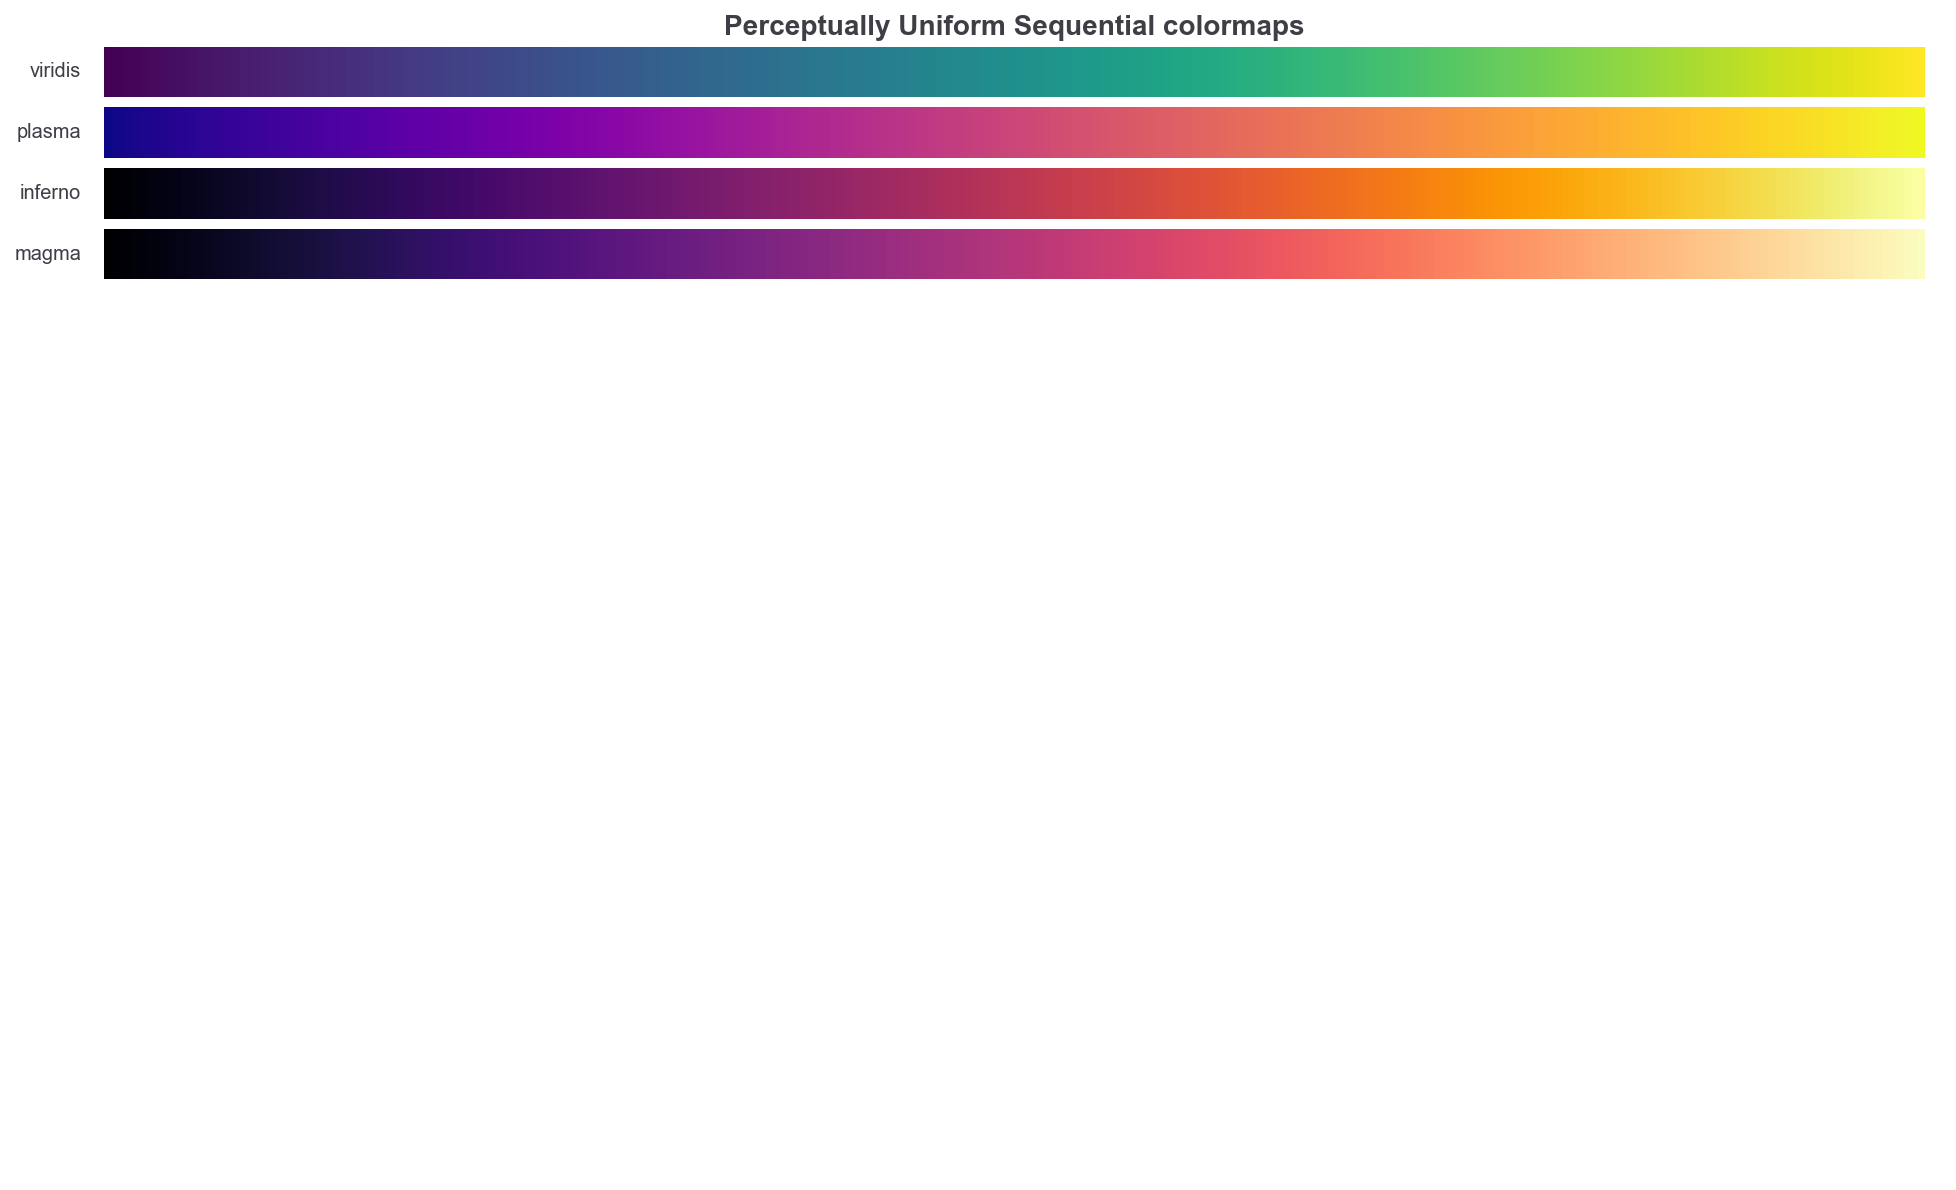

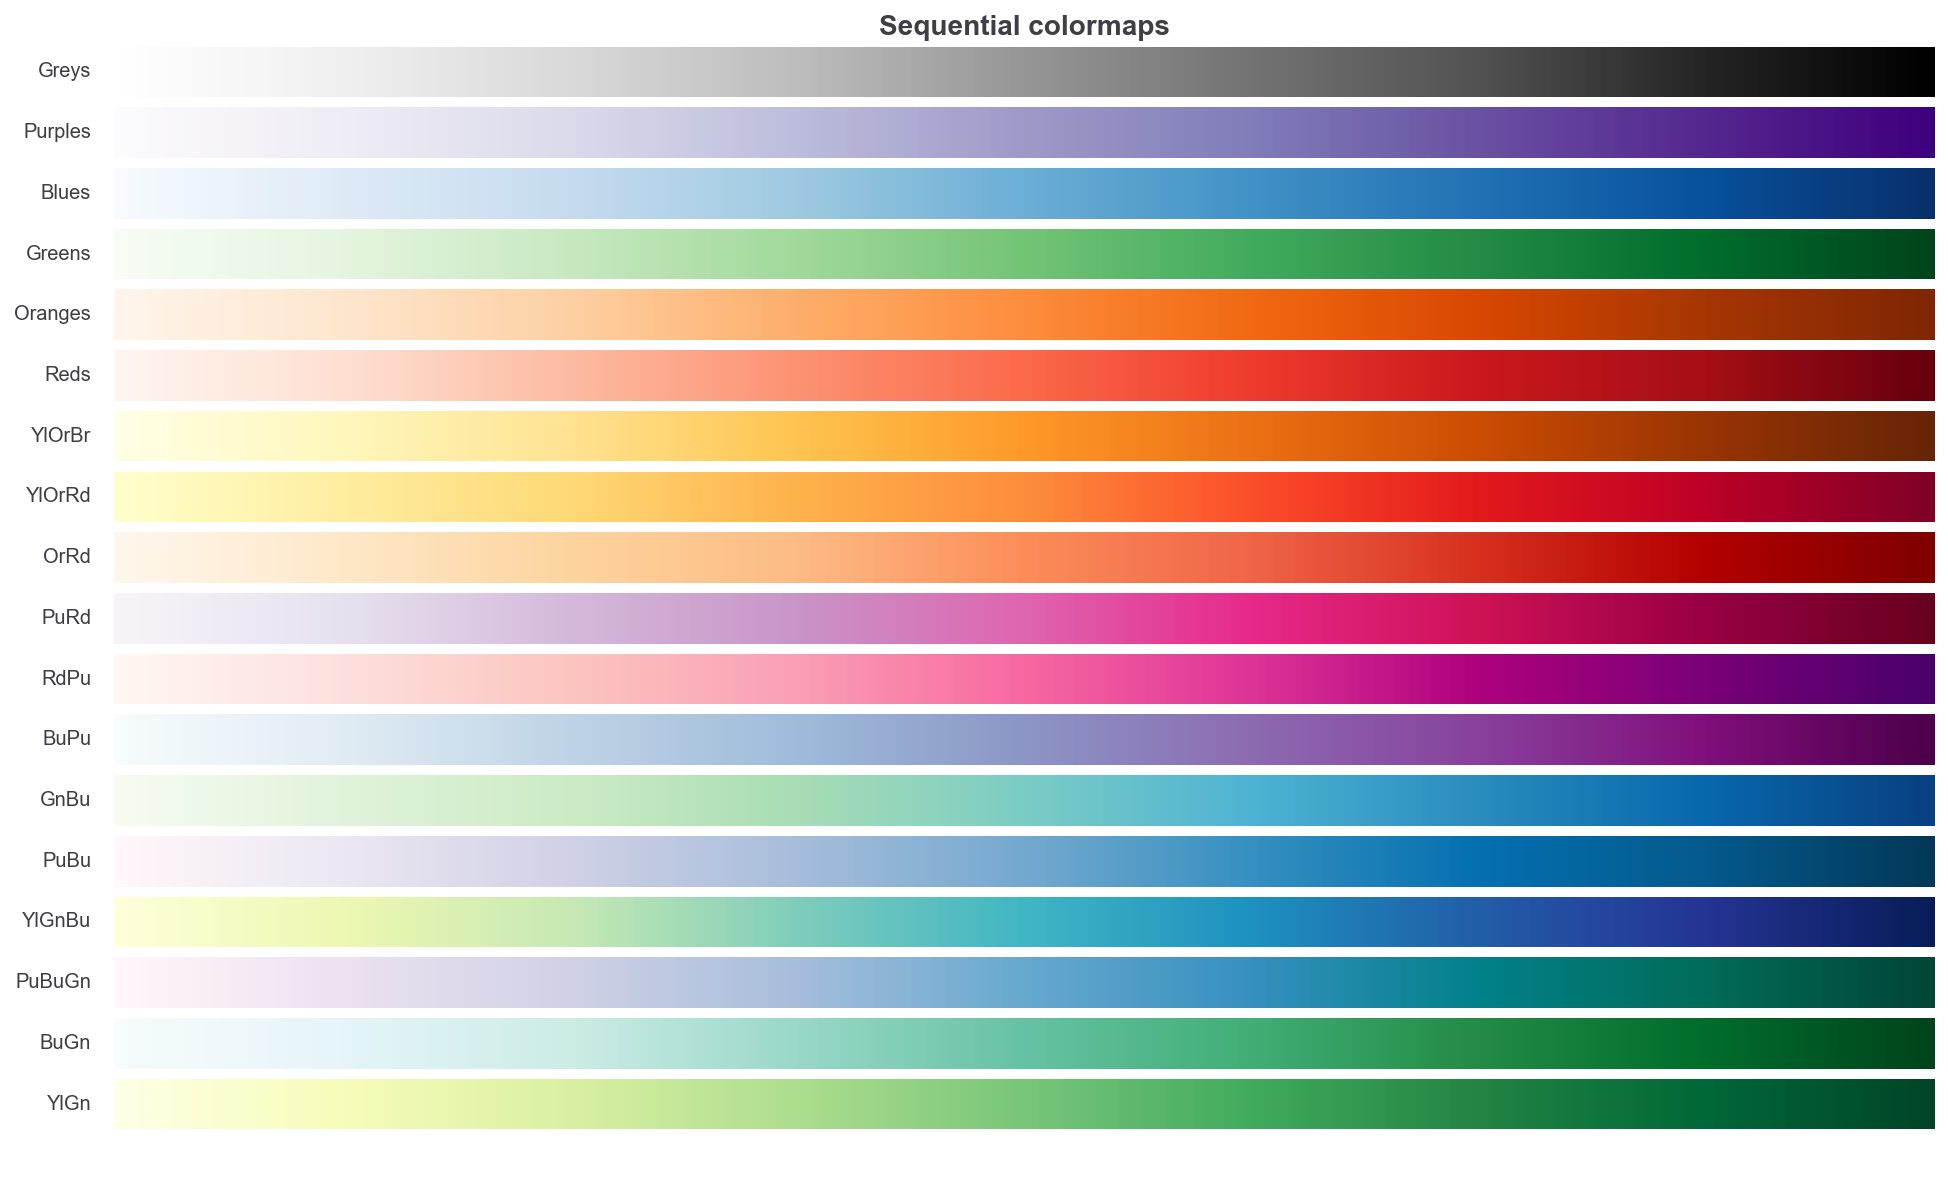

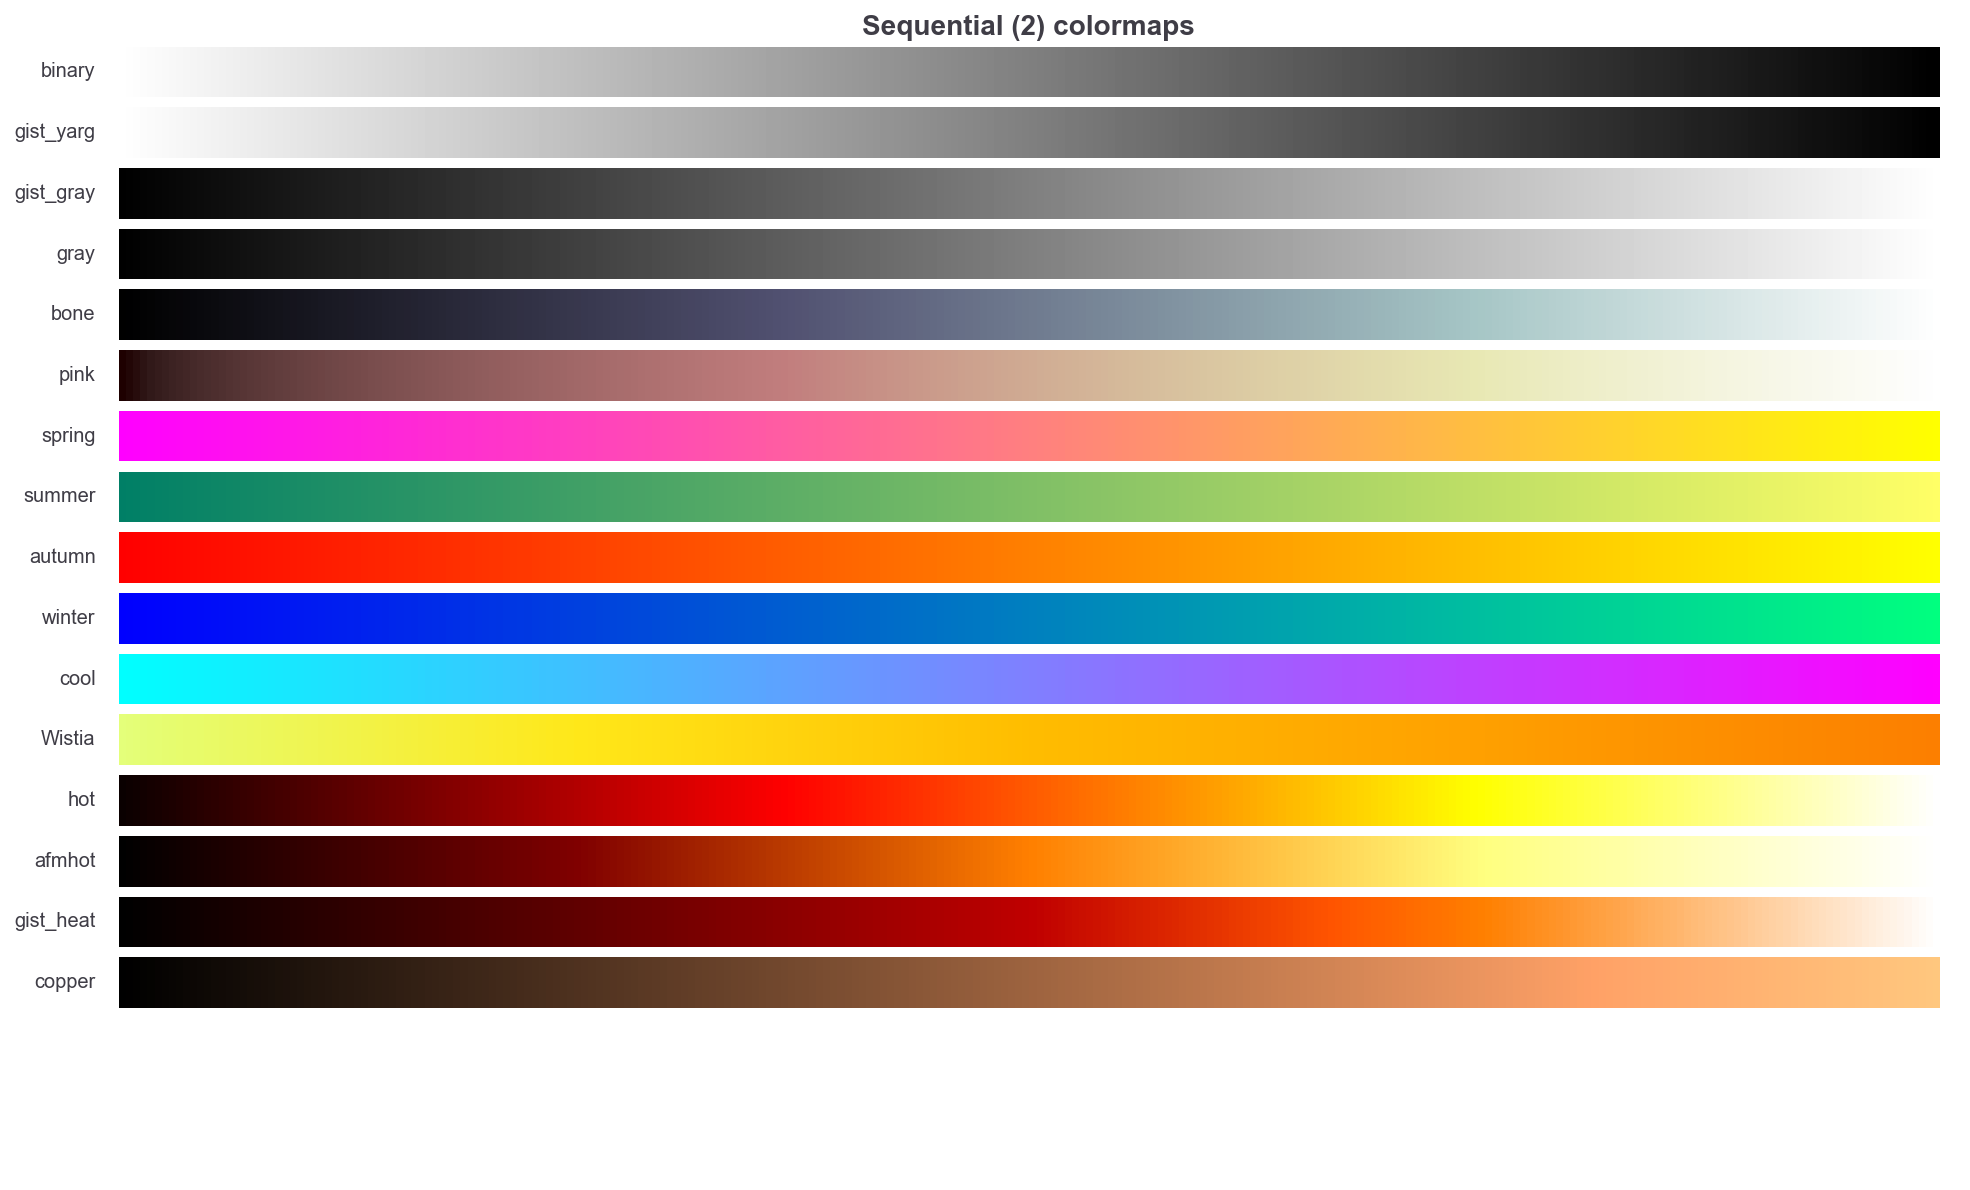

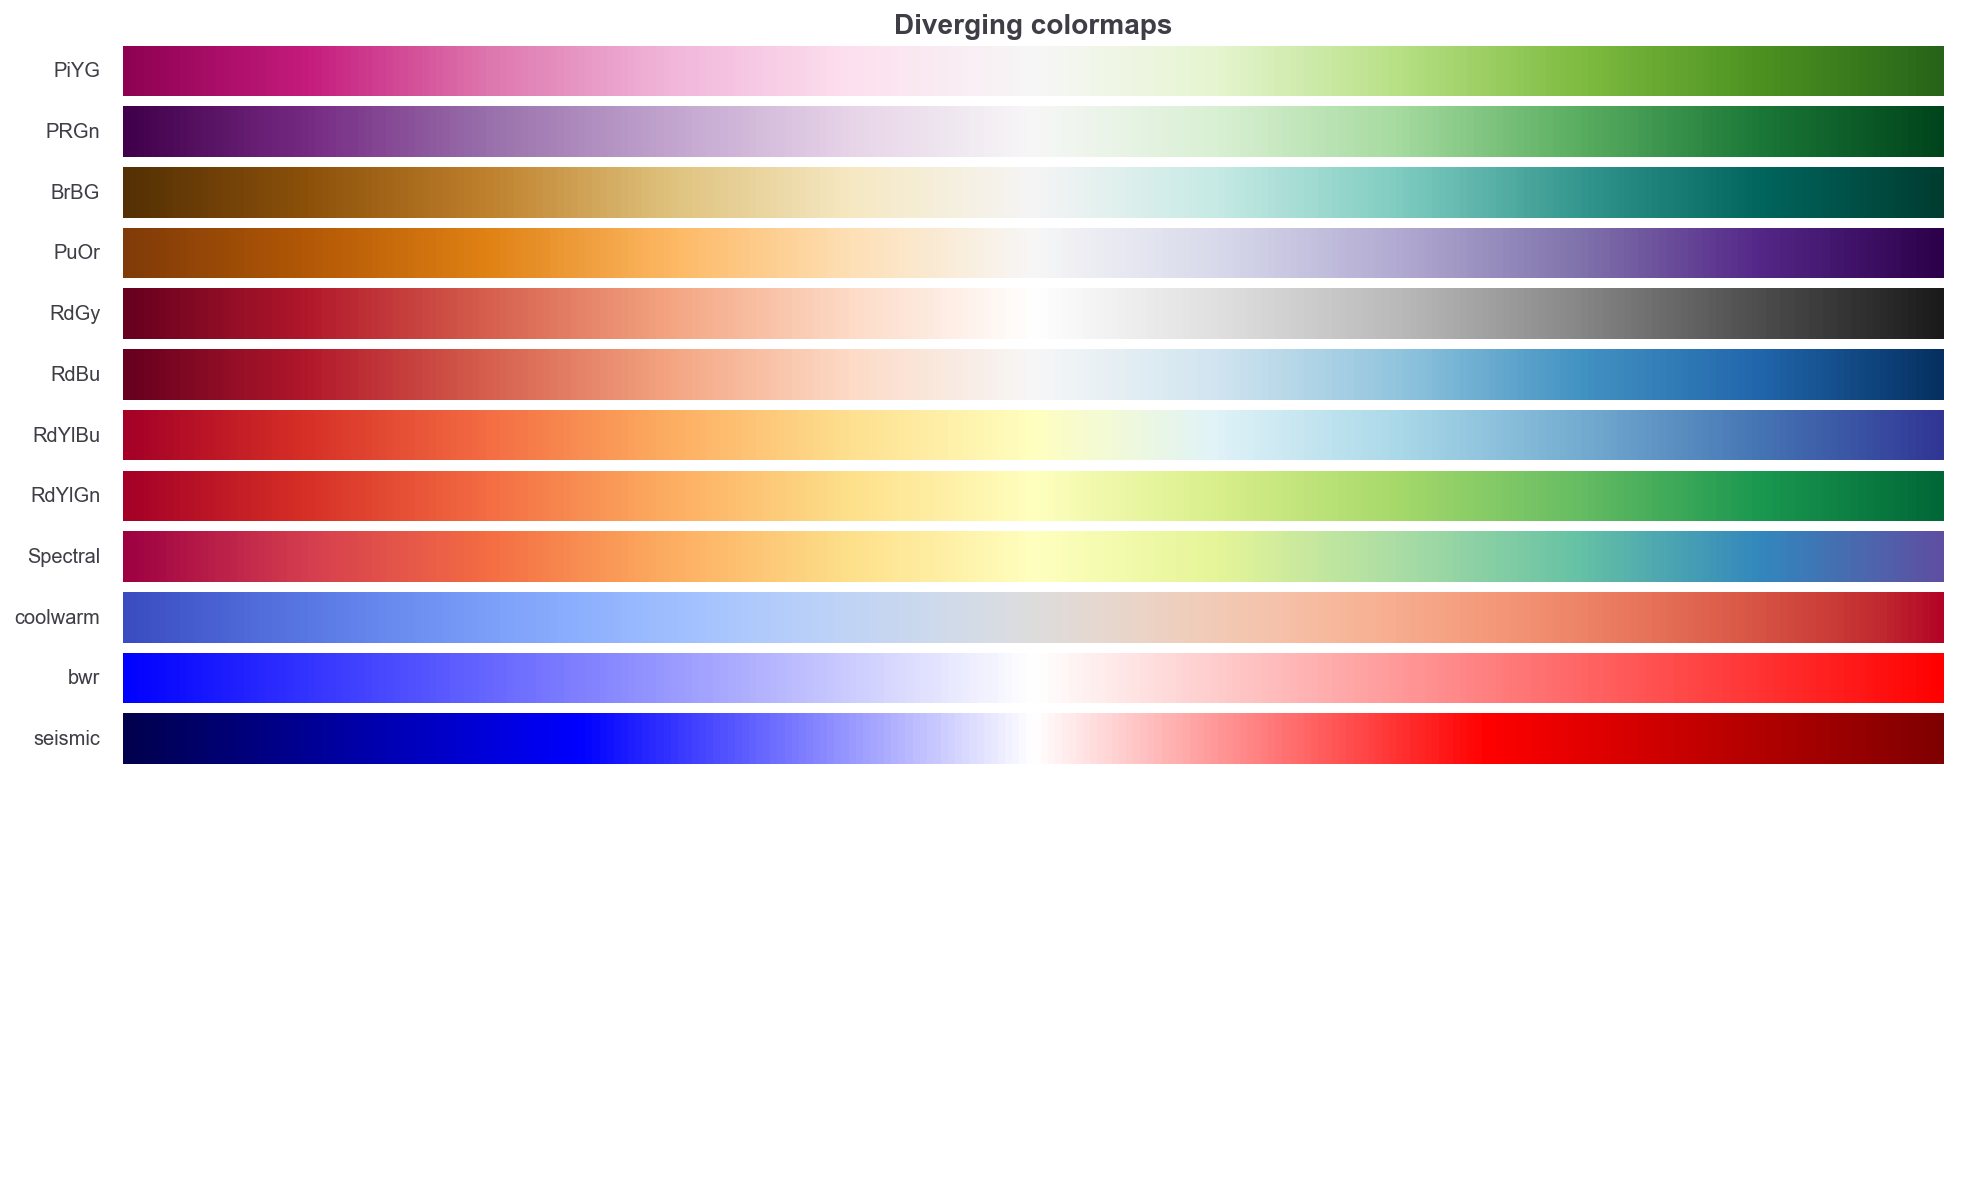

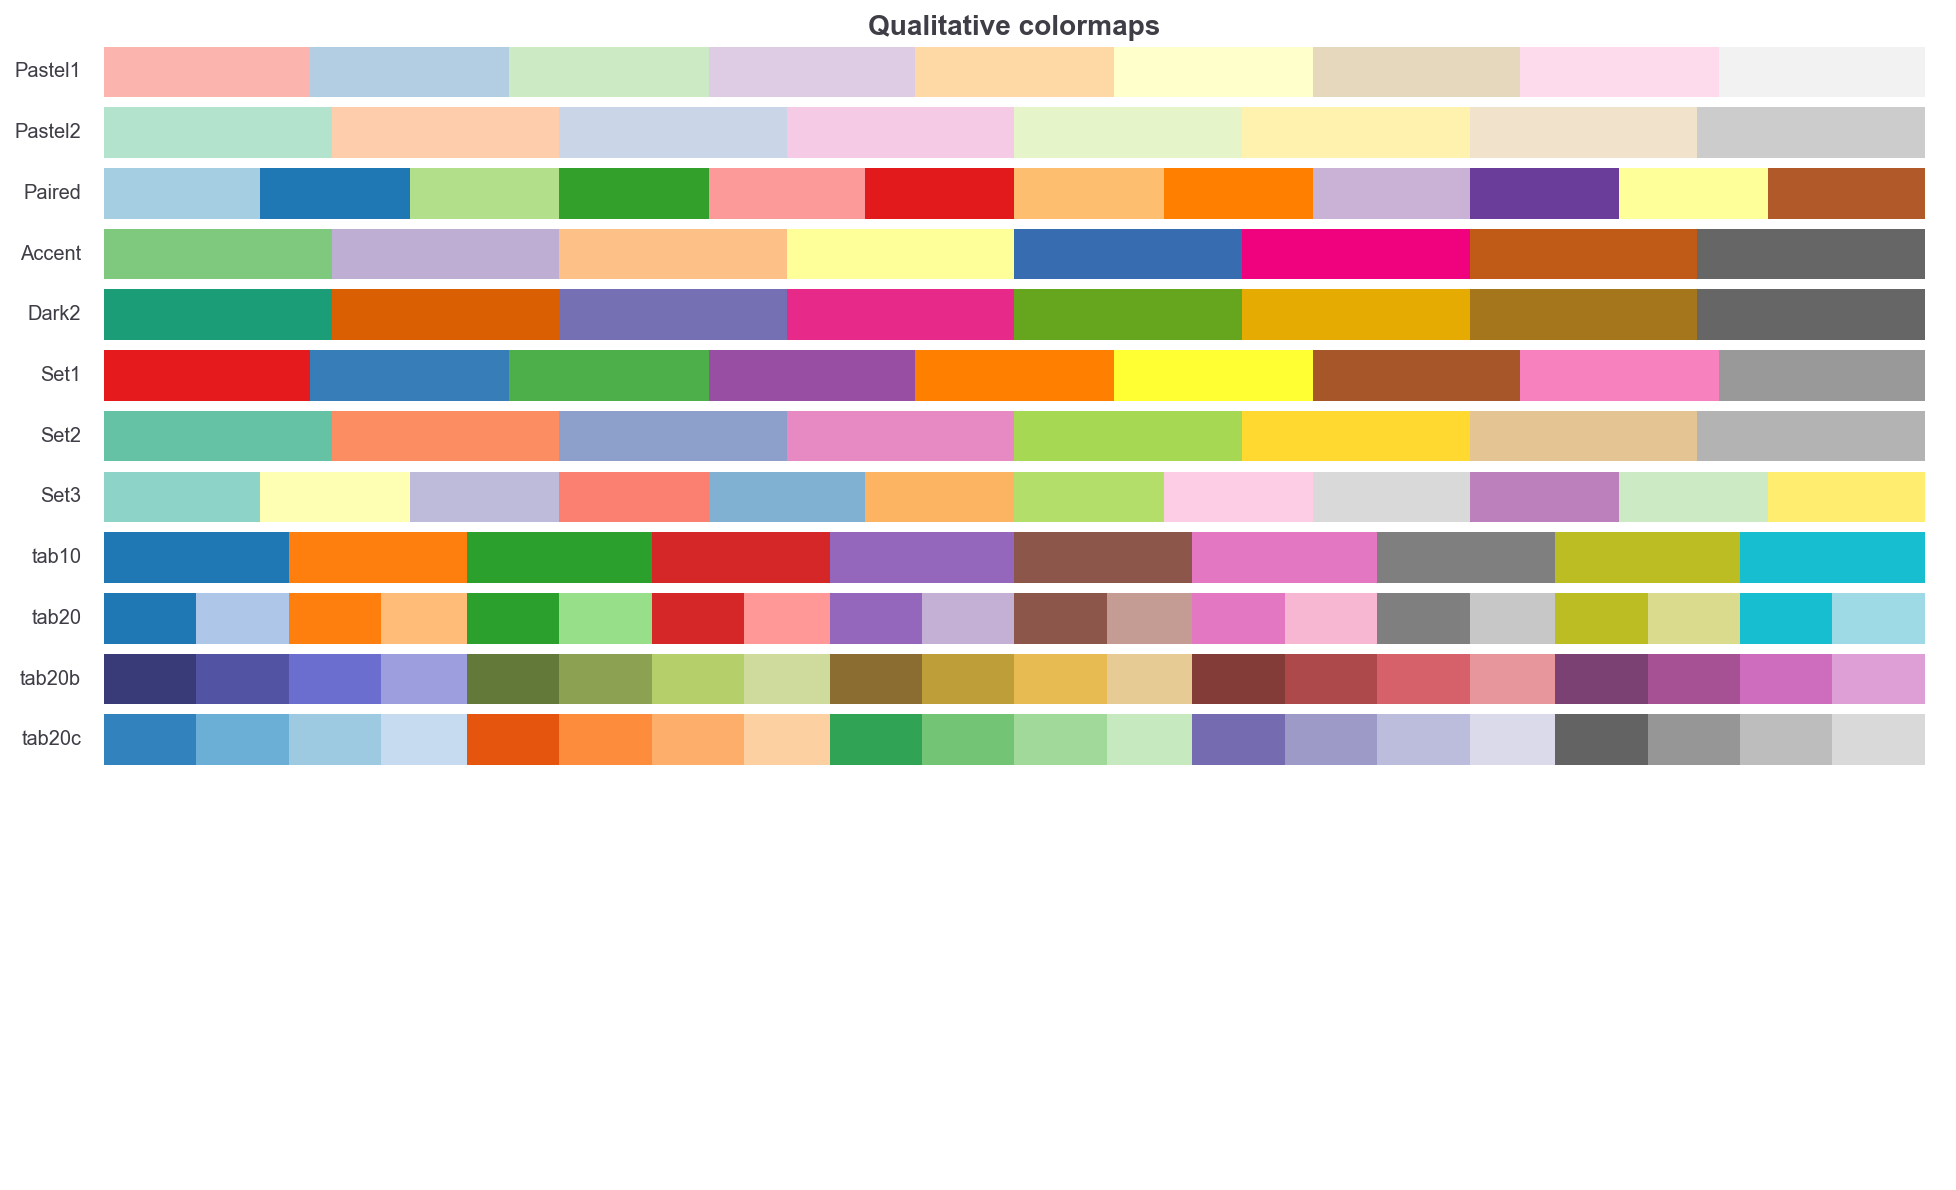

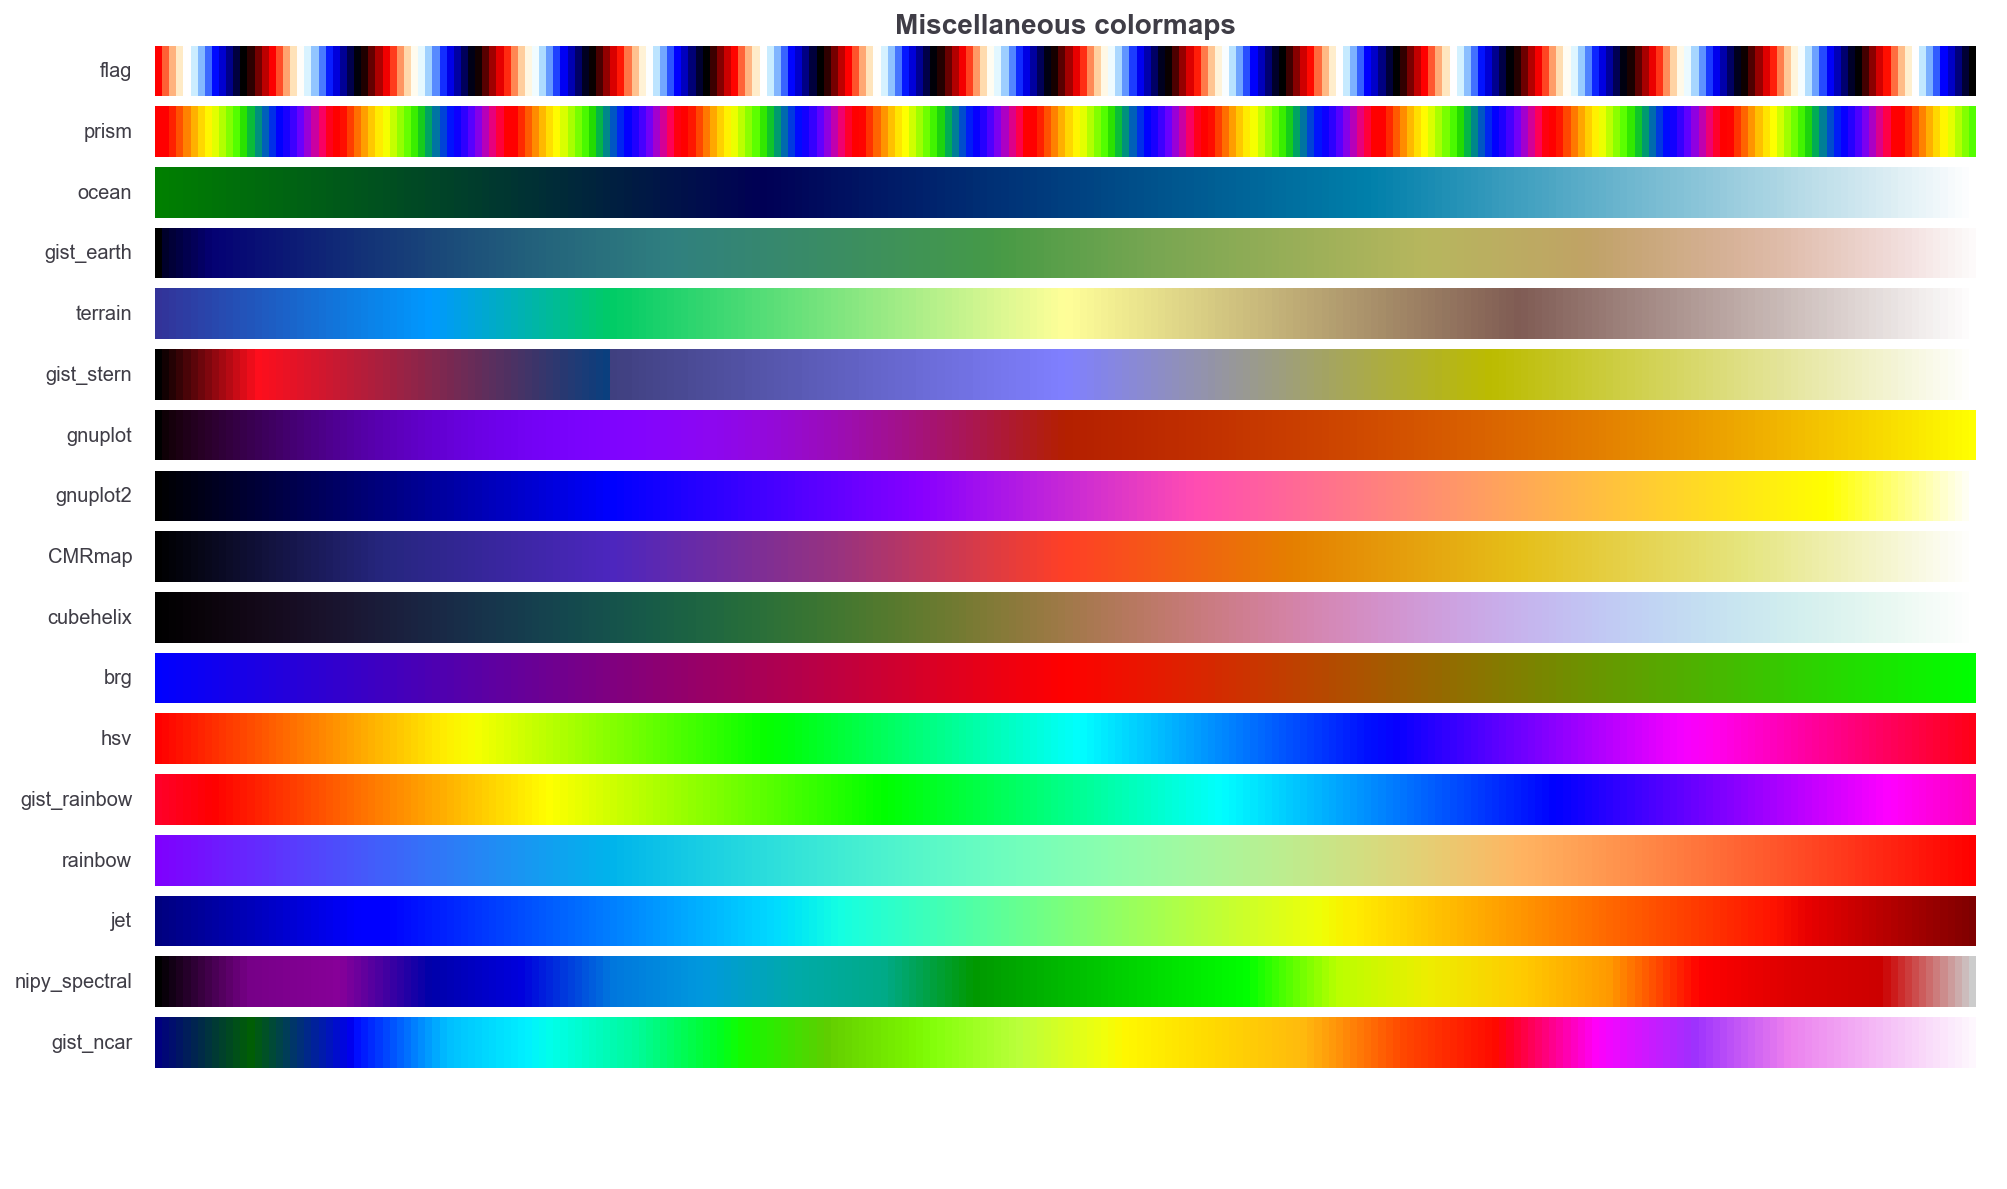

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

## Serialiszing colormaps and use for plotting

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# length of artificial time series
n_obs = 1000

# number of different assets
n_assets = 4

# sample Nx4 data series matrix
artificial_returns = np.random.randn(n_obs, n_assets) + 0.05
artificial_returns

array([[ 1.67435, -0.56176, -0.47817, -1.02297],
       [ 0.91541, -2.25154,  1.79481, -0.71121],
       [ 0.36904, -0.19937,  1.51211, -2.01014],
       ...,
       [ 0.12342,  0.46603, -1.8292 ,  0.62546],
       [ 0.15206,  1.2343 , -0.74484, -0.0759 ],
       [-0.91035, -0.79391,  0.67834,  0.58721]])

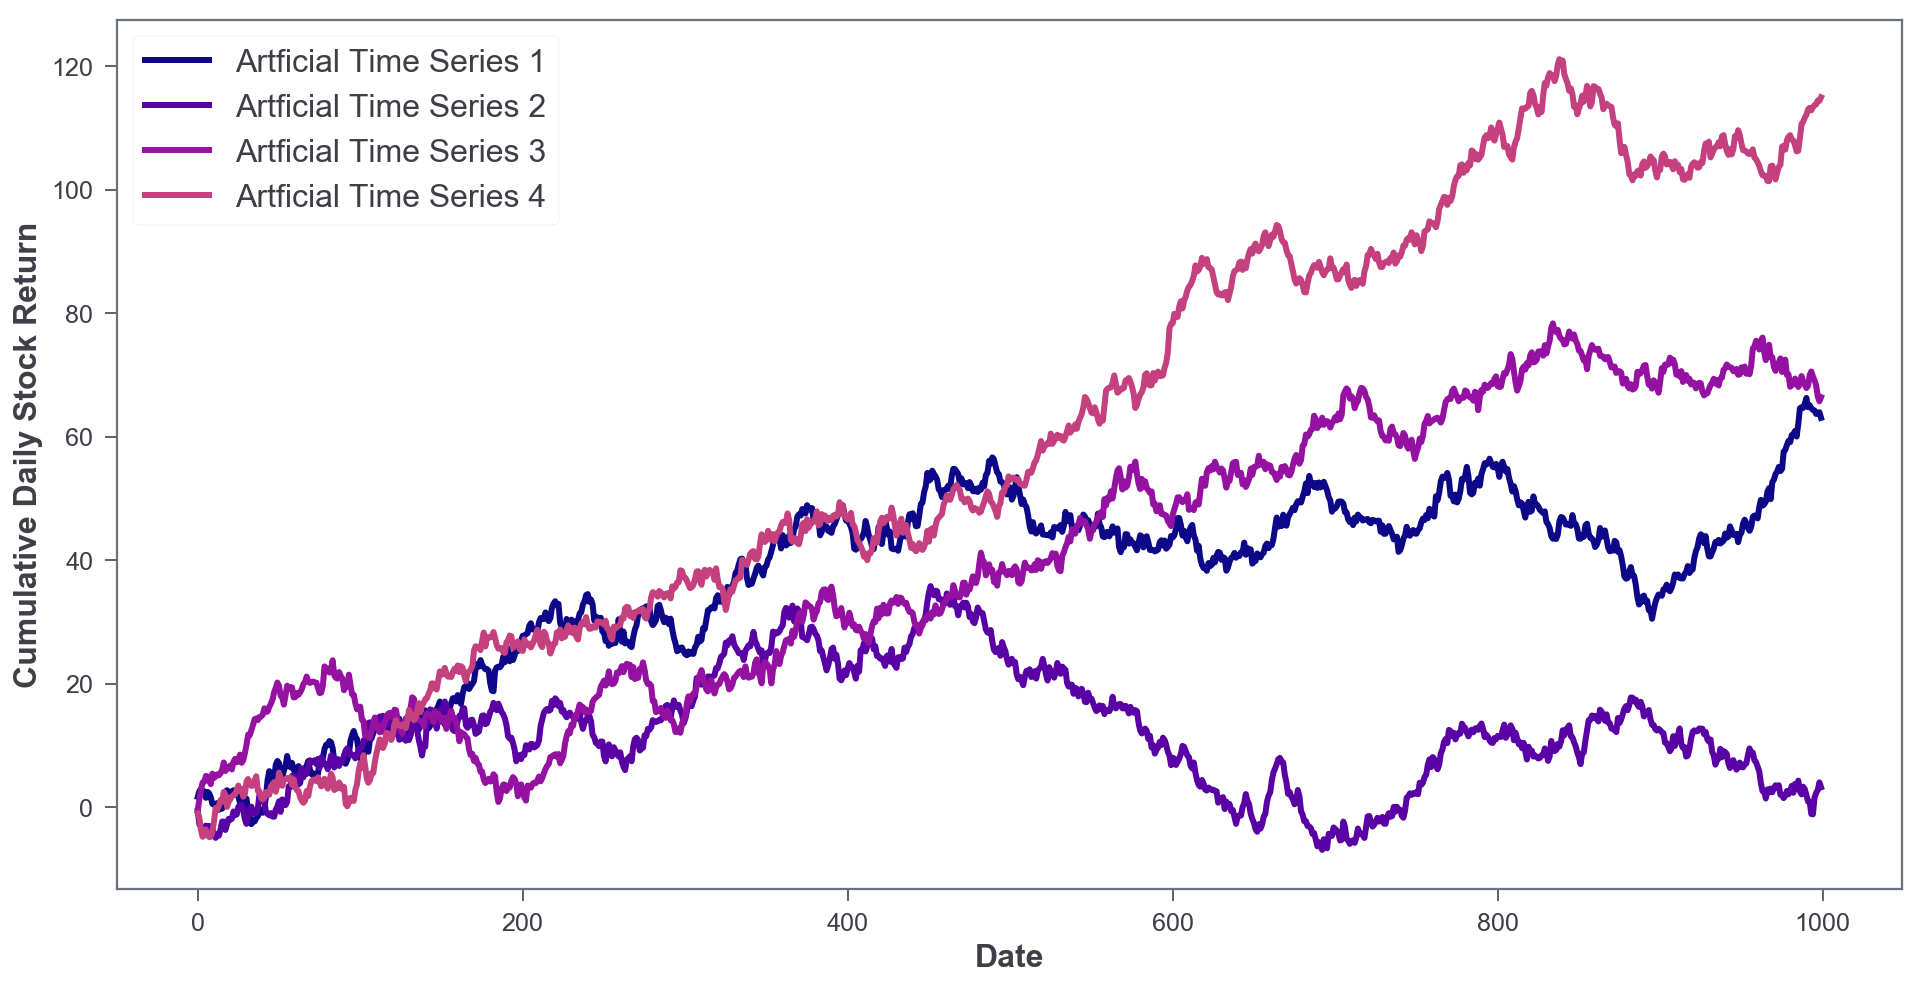

In [9]:
# get colormap
colors = plt.cm.plasma(np.linspace(0,3,20))

# plot cumulative sums
for i in range(artificial_returns.shape[1]):
    plt.plot(artificial_returns.T[i].cumsum(), color=colors[i], label='Artficial Time Series {}'.format(i + 1));
plt.legend(loc='best');
plt.xlabel('Date');
plt.ylabel('Cumulative Daily Stock Return');
plt.show()

# Plotly and Cufflinks

In [10]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [13]:
cf.go_offline()
df = pd.DataFrame(np.random.randn(100, 4), columns=['A', 'B', 'C', 'D'])
#df2 = pd.DataFrame({'category': ['A', 'B', 'C'], 'Values': [32, 43, 50]})

df.iplot()

# Bokeh

In [14]:
import numpy as np
import pandas as pd

from bokeh.plotting import figure, show, output_file
from bokeh.palettes import brewer

N = 20
cats = 10
df = pd.DataFrame(np.random.randint(10, 100, size=(N, cats))).add_prefix('y')

def stacked(df):
    df_top = df.cumsum(axis=1)
    df_bottom = df_top.shift(axis=1).fillna({'y0': 0})[::-1]
    df_stack = pd.concat([df_bottom, df_top], ignore_index=True)
    return df_stack

areas = stacked(df)
colors = brewer['Spectral'][areas.shape[1]]
x2 = np.hstack((df.index[::-1], df.index))

p = figure(x_range=(0, N-1), y_range=(0, 800))
p.grid.minor_grid_line_color = '#eeeeee'

p.patches([x2] * areas.shape[1], [areas[c].values for c in areas],
          color=colors, alpha=0.8, line_color=None)

output_file('stacked_area.html', title='stacked_area.py example')

show(p)

In [15]:
from bokeh.sampledata.perceptions import probly

In [16]:
probly

Almost Certainly  Highly Likely  Very Good Chance  Probable  Likely  \
0           95.00000             80                85        75      66   
1           95.00000             75                75        51      75   
2           95.00000             85                85        70      75   
3           95.00000             85                85        70      75   
4           98.00000             95                80        70      70   
5           95.00000             99                85        90      75   
6           85.00000             95                65        80      40   
7           97.00000             95                75        70      70   
..               ...            ...               ...       ...     ...   
38          80.00000             90                70        80      80   
39          95.00000             90                90        80      90   
40          99.00000             90                80        90      60   
41          85.00000             80                80        70      70   
42          90.00000             70                80        75      70   
43          95.00000             80                90        75      70   
44          85.00000             90                75        65      65   
45          95.00000             80                75        75      60   

    Probably  We Believe  Better Than Even         ...          We Doubt  \
0         75          66          55.00000         ...                40   
1         51          51          51.00000         ...                20   
2         70          80          60.00000         ...                30   
3         70          80          60.00000         ...                30   
4         75          65          60.00000         ...                10   
5         75          80          65.00000         ...                 7   
6         45          80          60.00000         ...                45   
7         80          75          55.00000         ...                25   
..       ...         ...               ...         ...               ...   
38        80          70          60.00000         ...                10   
39        90          85          55.00000         ...                15   
40        50          90          60.00000         ...                40   
41        70          65          51.00000         ...                30   
42        65          70          60.00000         ...                15   
43        75         100          60.00000         ...                10   
44        60          95          55.00000         ...                95   
45        68          55          51.00000         ...                25   

    Improbable  Unlikely  Probably Not  Little Chance  Almost No Chance  \
0     20.00000        30      15.00000             20           5.00000   
1     49.00000        25      49.00000              5           5.00000   
2     10.00000        25      25.00000             20           1.00000   
3     10.00000        25      25.00000             20           1.00000   
4     50.00000         5      20.00000              5           1.00000   
5     15.00000         8      15.00000              5           1.00000   
6     35.00000        20      40.00000             20          10.00000   
7     30.00000        15      25.00000             20           3.00000   
..         ...       ...           ...            ...               ...   
38     0.00000        20      30.00000             10           1.00000   
39    20.00000        35      15.00000             15           5.00000   
40    20.00000        10      40.00000              5           1.00000   
41    15.00000        35      30.00000             10           5.00000   
42    35.00000        20      25.00000              5           2.00000   
43     5.00000        10      20.00000             10           1.00000   
44     5.00000        20      40.00000             25           2.00000   
45    20.